C:\Users\thu71\.conda\envs\thomas-env\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


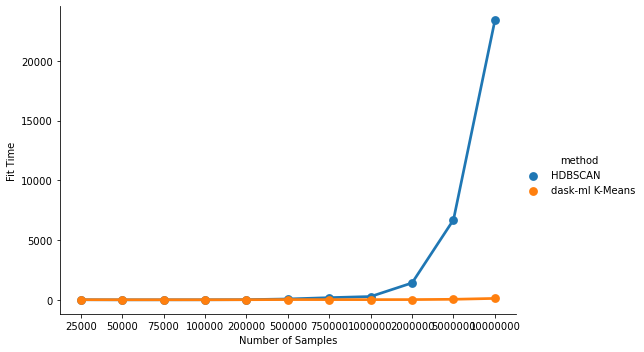

In [12]:
from sklearn.datasets import make_circles
from sklearn.utils import shuffle
import pandas as pd
import hdbscan

import time
import sklearn.cluster
import dask_ml.cluster
import seaborn as sns

Ns = [25000, 50000, 75000, 100000, 200000, 500000, 750000, 1000000, 2000000, 5000000, 10000000]
X, y = make_circles(n_samples=10_000, noise=0.05, random_state=0, factor=0.5)
X, y = shuffle(X, y)

timings = []
for n in Ns:
    X, y = make_circles(n_samples=n, random_state=n, noise=0.5, factor=0.5)
    t1 = time.time()
    hdbscan.HDBSCAN().fit(X)
    timings.append(('HDBSCAN', n, time.time() - t1))
    t1 = time.time()
    dask_ml.cluster.KMeans(n_clusters=10).fit(X)
    timings.append(('dask-ml K-Means', n, time.time() - t1))


df = pd.DataFrame(timings, columns=['method', 'Number of Samples', 'Fit Time'])
sns.factorplot(x='Number of Samples', y='Fit Time', hue='method',
               data=df, aspect=1.5)

In [14]:
import matplotlib.pyplot as plt

C:\Users\thu71\.conda\envs\thomas-env\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\thu71\.conda\envs\thomas-env\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


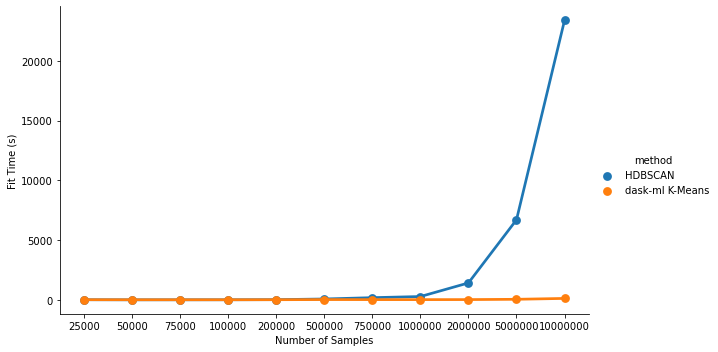

In [19]:
df = pd.DataFrame(timings, columns=['method', 'Number of Samples', 'Fit Time'])

p = sns.factorplot(x='Number of Samples', y='Fit Time', hue='method',
               data=df, aspect=1.7, ax=ax)
p.set(ylabel='Fit Time (s)')